# Visualising Distributions of Data

In this section, we will see how to: 
- Visualise univariate distributions
- Visualise bivariate distributions

We will also start using the ```seaborn``` library for data visualisation. Seaborn is a python library built on top of ```matplotlib```. It creates much more attractive plots than ```matplotlib```, and is often more concise than ```matplotlib``` when you want to customize your plots, add colors, grids etc.

Let's start with univariate distributions.

## Visualising Univariate Distributions

We have already visualised univariate distributions before using boxplots, histograms etc. Let's now do that using seaborn. We'll use the sales data for the upcoming few exercises.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# the commonly used alias for seaborn is sns
import seaborn as sns

# set a seaborn style of your taste
sns.set_style("whitegrid")

# data
df = pd.read_csv("./global_sales_data/market_fact.csv")

FileNotFoundError: ignored

### Histograms and Density Plots

Histograms and density plots show the frequency of a numeric variable along the y-axis, and the value along the x-axis. The ```sns.distplot()``` function plots a density curve. Notice that this is aesthetically better than vanilla ```matplotlib```.

In [2]:
# simple density plot
sns.distplot(df['Shipping_Cost'])
plt.show()

NameError: ignored

You can also plot what is known as the **rug plot** which plots the actual data points as small vertical bars. The rug plot is simply specified as an argument of the ```distplot()```.

C:\Users\krish\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


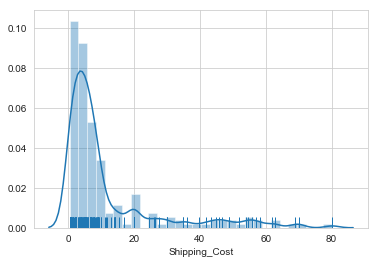

In [0]:
# rug = True
# plotting only a few points since rug takes a long while
sns.distplot(df['Shipping_Cost'][:200], rug=True)
plt.show()

Simple density plot (without the histogram bars) can be created by specifying ```hist=False```.

C:\Users\krish\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


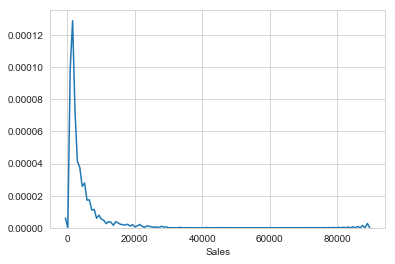

In [0]:
sns.distplot(df['Sales'], hist=False)
plt.show()

Since seaborn uses matplotlib behind the scenes, the usual matplotlib functions work well with seaborn. For example, you can use subplots to plot multiple univariate distributions.

C:\Users\krish\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


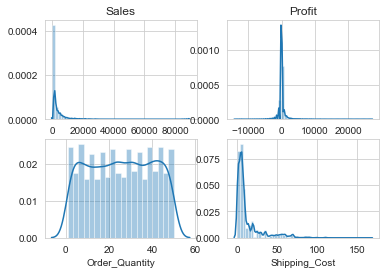

In [0]:
# subplots

# subplot 1
plt.subplot(2, 2, 1)
plt.title('Sales')
sns.distplot(df['Sales'])

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Profit')
sns.distplot(df['Profit'])

# subplot 3
plt.subplot(2, 2, 3)
# plt.title('Order Quantity')
sns.distplot(df['Order_Quantity'])

# subplot 4
plt.subplot(2, 2, 4)
# plt.title('Shipping Cost')
sns.distplot(df['Shipping_Cost'])

plt.show()


### Boxplots

Boxplots are a great way to visualise univariate data because they represent statistics such as the 25th percentile, 50th percentile, etc.

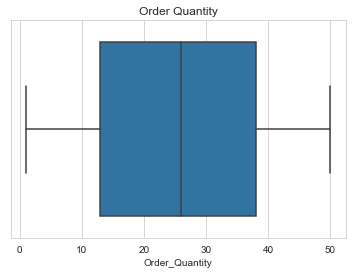

In [0]:
# boxplot
sns.boxplot(df['Order_Quantity'])
plt.title('Order Quantity')

plt.show()

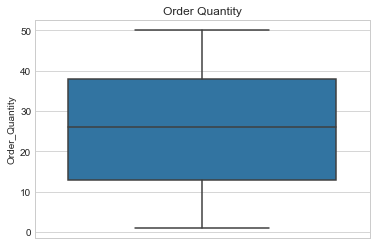

In [0]:
# to plot the values on the vertical axis, specify y=variable
sns.boxplot(y=df['Order_Quantity'])
plt.title('Order Quantity')

plt.show()

## Visualising Bivariate Distributions

Bivariate distributions are simply two univariate distributions plotted on x and y axes respectively. They help you observe the relationship between the two variables.

They are also called joint distributions and are created using ```sns.jointplot()```.


C:\Users\krish\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


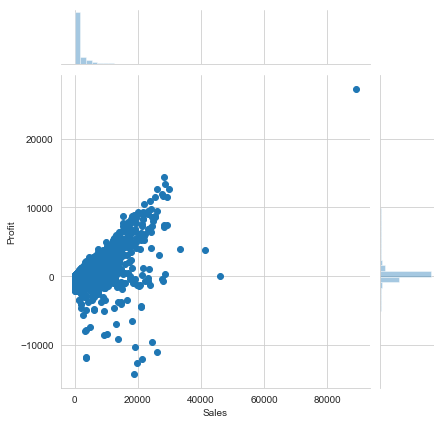

In [0]:
# joint plots of Profit and Sales

sns.jointplot('Sales', 'Profit', df)
plt.show()

# same as sns.jointplot(df['Sales'], df['Profit'])

Notice that both the distributions are heavily skewed and all the points seem to be concentrated in one region. That is because of some extreme values of Profits and Sales which matplotlib is trying to accomodate in the limited space of the plot.

Let's remove that point and plot again.


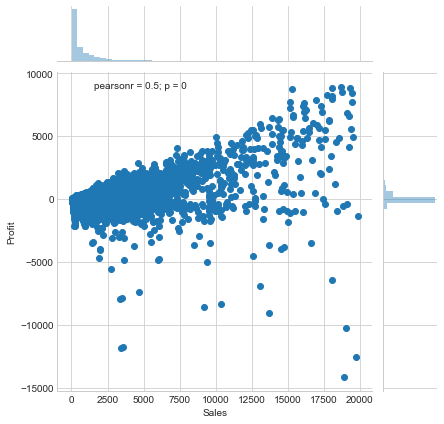

In [0]:
# remove points having extreme values
df = df[(df.Profit < 10000) & (df.Sales < 20000)]

sns.jointplot('Sales', 'Profit', df)
plt.show()



You can adjust the arguments of the jointplot() to make the plot more readable. For e.g. specifying ```kind=hex``` will create a 'hexbin plot'. 

C:\Users\krish\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


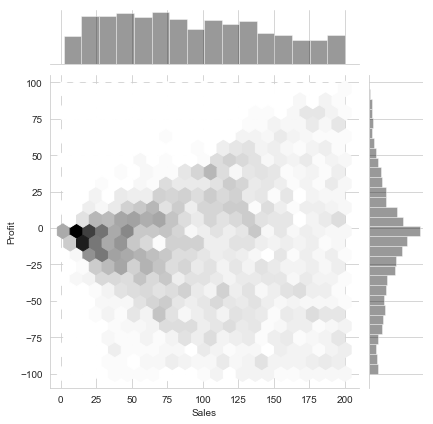

In [0]:
# plotting low Sales value orders
# hex plot
df = pd.read_csv("./global_sales_data/market_fact.csv")
df = df[(df.Profit < 100) & (df.Profit > -100) & (df.Sales < 200)]
sns.jointplot('Sales', 'Profit', df, kind="hex", color="k")
plt.show()


The bottom-right region of the plot represents orders where the Sales is high but the Profit is low, i.e. even when the store is getting highb revenue, the orders are still making losses. These are the kind of orders a business would want to avoid. 

We'll see how to drill further down in the next section. For now, let's move to plotting pairwise relationships.

## Plotting Pairwise Relationships

You'll find it helpful to plot pairwise relationships between multiple numeric variables. For e.g., here we have taken the prices of some popular cryptocurrencies such as bitcoin, litecoin, ethereum, monero, neo, quantum and ripple. 

Now, the crypto enthusiasts would know that the prices of these currencies vary with each other. If bitcoin goes up, the others will likely follow suit, etc.


Now, say you want to trade in some currencies. Given a set of cryptocurrencies, how will you decide when and which one to buy/sell? It will be helpful to analyse past data and identify some trends in these currencies.




In [0]:
# reading cryptocurrency files
btc = pd.read_csv("crypto_data/bitcoin_price.csv")
ether = pd.read_csv("crypto_data/ethereum_price.csv")
ltc = pd.read_csv("crypto_data/litecoin_price.csv")
monero = pd.read_csv("crypto_data/monero_price.csv")
neo = pd.read_csv("crypto_data/neo_price.csv")
quantum = pd.read_csv("crypto_data/qtum_price.csv")
ripple = pd.read_csv("crypto_data/ripple_price.csv")

# putting a suffix with column names so that joins are easy
btc.columns = btc.columns.map(lambda x: str(x) + '_btc')
ether.columns = ether.columns.map(lambda x: str(x) + '_et')
ltc.columns = ltc.columns.map(lambda x: str(x) + '_ltc')
monero.columns = monero.columns.map(lambda x: str(x) + '_mon')
neo.columns = neo.columns.map(lambda x: str(x) + '_neo')
quantum.columns = quantum.columns.map(lambda x: str(x) + '_qt')
ripple.columns = ripple.columns.map(lambda x: str(x) + '_rip')

btc.head()

,Date_btc,Open_btc,High_btc,Low_btc,Close_btc,Volume_btc,Market Cap_btc
0,"Nov 07, 2017",7023.10,7253.32,7023.10,7144.38,"2,326,340,000","117,056,000,000"
1,"Nov 06, 2017",7403.22,7445.77,7007.31,7022.76,"3,111,900,000","123,379,000,000"
2,"Nov 05, 2017",7404.52,7617.48,7333.19,7407.41,"2,380,410,000","123,388,000,000"
3,"Nov 04, 2017",7164.48,7492.86,7031.28,7379.95,"2,483,800,000","119,376,000,000"
4,"Nov 03, 2017",7087.53,7461.29,7002.94,7207.76,"3,369,860,000","118,084,000,000"


In [0]:
m1 = pd.merge(btc, ether, how="inner", left_on="Date_btc", right_on="Date_et")
m1

,Date_btc,Open_btc,High_btc,Low_btc,Close_btc,Volume_btc,Market Cap_btc,Date_et,Open_et,High_et,Low_et,Close_et,Volume_et,Market Cap_et
0,"Nov 07, 2017",7023.10,7253.32,7023.10,7144.38,"2,326,340,000","117,056,000,000","Nov 07, 2017",298.570000,304.840000,290.770000,294.660000,"5407,66,000","28,533,300,000"
1,"Nov 06, 2017",7403.22,7445.77,7007.31,7022.76,"3,111,900,000","123,379,000,000","Nov 06, 2017",296.430000,305.420000,293.720000,298.890000,"5793,59,000","28,322,700,000"
2,"Nov 05, 2017",7404.52,7617.48,7333.19,7407.41,"2,380,410,000","123,388,000,000","Nov 05, 2017",300.040000,301.370000,295.120000,296.260000,"3376,58,000","28,661,500,000"
3,"Nov 04, 2017",7164.48,7492.86,7031.28,7379.95,"2,483,800,000","119,376,000,000","Nov 04, 2017",305.480000,305.480000,295.800000,300.470000,"4164,79,000","29,175,300,000"
4,"Nov 03, 2017",7087.53,7461.29,7002.94,7207.76,"3,369,860,000","118,084,000,000","Nov 03, 2017",288.500000,308.310000,287.690000,305.710000,"6463,40,000","27,547,400,000"
5,"Nov 02, 2017",6777.77,7367.33,6758.72,7078.50,"4,653,770,000","112,910,000,000","Nov 02, 2017",290.730000,293.910000,281.170000,287.430000,"9049,01,000","27,754,200,000"
6,"Nov 01, 2017",6440.97,6767.31,6377.88,6767.31,"2,870,320,000","107,287,000,000","Nov 01, 2017",305.760000,306.400000,290.580000,291.690000,"5538,64,000","29,183,600,000"
7,"Oct 31, 2017",6132.02,6470.43,6103.33,6468.40,"2,311,380,000","102,130,000,000","Oct 31, 2017",307.380000,310.550000,305.880000,305.880000,"3695,83,000","29,331,500,000"
8,"Oct 30, 2017",6114.85,6214.99,6040.85,6130.53,"1,772,150,000","101,833,000,000","Oct 30, 2017",304.780000,310.500000,304.350000,307.750000,"3314,42,000","29,077,600,000"
9,"Oct 29, 2017",5754.44,6255.71,5724.58,6153.85,"2,859,040,000","95,819,800,000","Oct 29, 2017",296.380000,313.750000,296.380000,305.090000,"5517,52,000","28,270,200,000"


In [0]:
# merging all the files by date

m2 = pd.merge(m1, ltc, how="inner", left_on="Date_btc", right_on="Date_ltc")
m3 = pd.merge(m2, monero, how="inner", left_on="Date_btc", right_on="Date_mon")
m4 = pd.merge(m3, neo, how="inner", left_on="Date_btc", right_on="Date_neo")
m5 = pd.merge(m4, quantum, how="inner", left_on="Date_btc", right_on="Date_qt")
crypto = pd.merge(m5, ripple, how="inner", left_on="Date_btc", right_on="Date_rip")

crypto.head()

,Date_btc,Open_btc,High_btc,Low_btc,Close_btc,Volume_btc,Market Cap_btc,Date_et,Open_et,High_et,...,Close_qt,Volume_qt,Market Cap_qt,Date_rip,Open_rip,High_rip,Low_rip,Close_rip,Volume_rip,Market Cap_rip
0,"Nov 07, 2017",7023.10,7253.32,7023.10,7144.38,"2,326,340,000","117,056,000,000","Nov 07, 2017",298.57,304.84,...,11.21,"122,951,000","760,320,000","Nov 07, 2017",0.205103,0.211375,0.203978,0.210354,"114,073,000","7,902,920,000"
1,"Nov 06, 2017",7403.22,7445.77,7007.31,7022.76,"3,111,900,000","123,379,000,000","Nov 06, 2017",296.43,305.42,...,10.44,"116,937,000","745,802,000","Nov 06, 2017",0.201967,0.208662,0.201410,0.205990,"102,233,000","7,782,080,000"
2,"Nov 05, 2017",7404.52,7617.48,7333.19,7407.41,"2,380,410,000","123,388,000,000","Nov 05, 2017",300.04,301.37,...,10.13,"49,288,500","739,113,000","Nov 05, 2017",0.203274,0.205124,0.201117,0.202055,"46,959,000","7,832,450,000"
3,"Nov 04, 2017",7164.48,7492.86,7031.28,7379.95,"2,483,800,000","119,376,000,000","Nov 04, 2017",305.48,305.48,...,10.05,"35,477,100","759,110,000","Nov 04, 2017",0.208083,0.208479,0.202133,0.203750,"74,013,200","8,017,770,000"
4,"Nov 03, 2017",7087.53,7461.29,7002.94,7207.76,"3,369,860,000","118,084,000,000","Nov 03, 2017",288.50,308.31,...,10.38,"55,018,600","719,701,000","Nov 03, 2017",0.206205,0.228026,0.201728,0.208133,"373,402,000","7,945,410,000"


In [0]:
# Subsetting only the closing prices column for plotting
curr = crypto[["Close_btc", "Close_et", 'Close_ltc', "Close_mon", "Close_neo", "Close_qt"]]
curr.head()

,Close_btc,Close_et,Close_ltc,Close_mon,Close_neo,Close_qt
0,7144.38,294.66,61.30,99.76,26.23,11.21
1,7022.76,298.89,55.17,102.92,26.32,10.44
2,7407.41,296.26,54.75,86.35,26.38,10.13
3,7379.95,300.47,55.04,87.30,26.49,10.05
4,7207.76,305.71,56.18,87.99,26.82,10.38


### Pairwise Scatter Plots

Now, since we have multiple numeric variables, ```sns.pairplot()``` is a good choice to plot all of them in one figure.

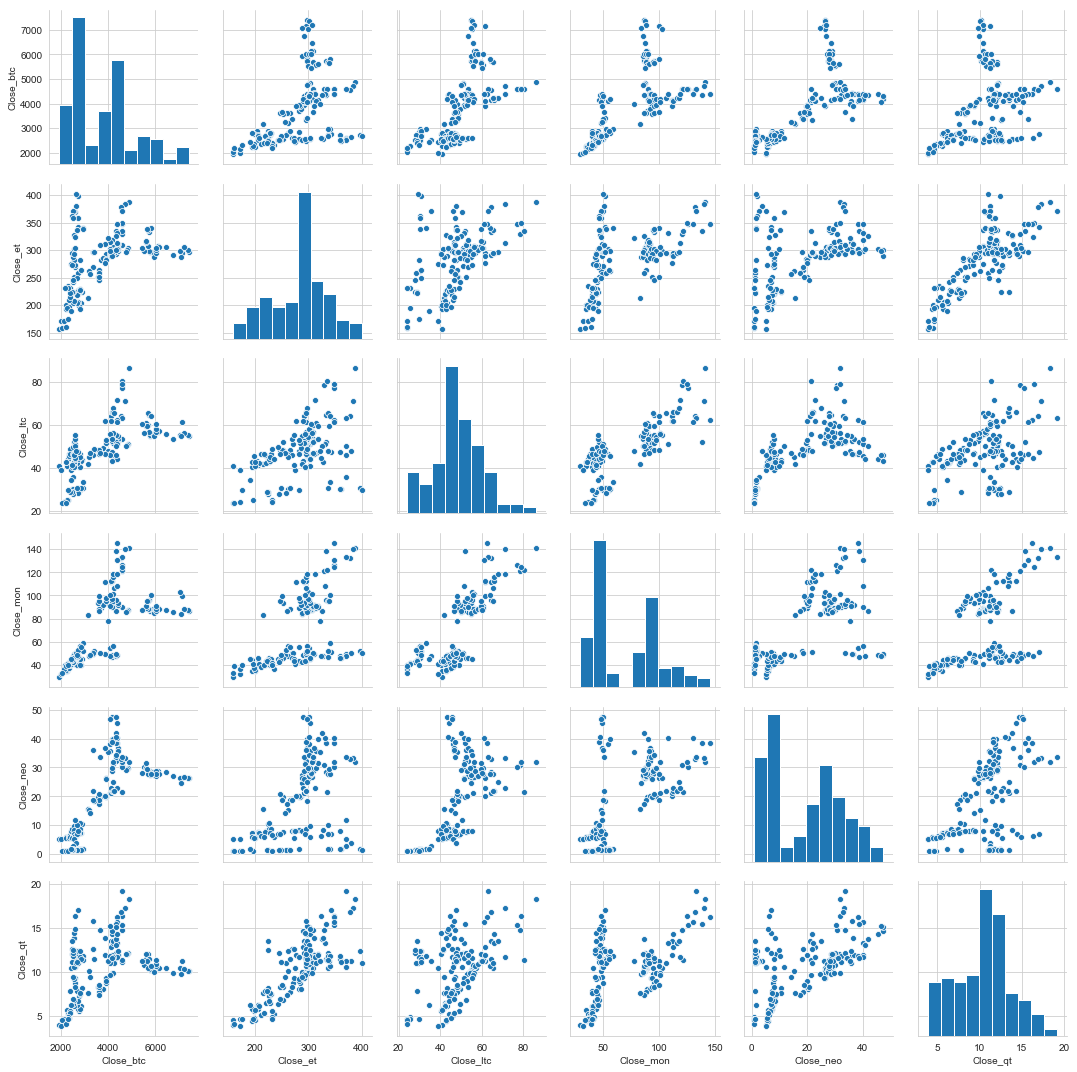

In [0]:
# pairplot
sns.pairplot(curr)
plt.show()

In [0]:
# You can also observe the correlation between the currencies 
# using df.corr()
cor = curr.corr()
round(cor, 3)

,Close_btc,Close_et,Close_ltc,Close_mon,Close_neo,Close_qt
Close_btc,1.000,0.449,0.658,0.697,0.735,0.382
Close_et,0.449,1.000,0.490,0.539,0.482,0.791
Close_ltc,0.658,0.490,1.000,0.793,0.641,0.448
Close_mon,0.697,0.539,0.793,1.000,0.669,0.518
Close_neo,0.735,0.482,0.641,0.669,1.000,0.557
Close_qt,0.382,0.791,0.448,0.518,0.557,1.000


The dataframe above is a **correlation matrix** of cryptocurrencies. Try finding some important relationships between currencies. Notice that quantum and ethereum are highly correlated (0.79).

## Heatmaps

It will be helpful to visualise the correlation matrix itself using ```sns.heatmap()```.

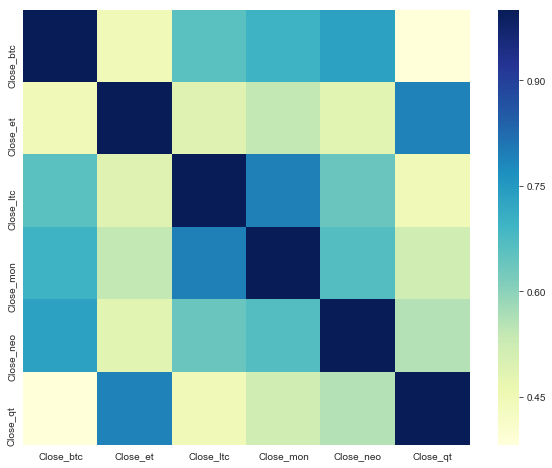

In [0]:
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=False)
plt.show()

The orange boxes show the most correlated currencies. Specifically, **ethereum-quantum (0.79)** and **monero-ltc (0.79)** are the most correlated pairs. Also, **neo-btc (0.73)** are quite highly correlated.

Please note that this data is from a specific time period only.

Thus, from a risk-minimisation point of view, you should not invest in these pairs of cryptocurrencies, since if one goes down, the other is likely to go down as well (but yes, if one goes up, you'll become filthy rich).


In the next section, we will explore how to plot categorical variables.